### Importing the data

In [5]:
# use these links to do so:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv('C://Users//Niharika//Churn.csv')

### Understanding the data

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.shape

(7043, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:

data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Manipulation

In [11]:
data_col=data.columns
data_col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
#Removing missing values 
data.dropna(inplace = True)

In [13]:
#Remove customer IDs from the data set
data1 = data.iloc[:,1:]

In [14]:
#Converting the target variable in a numeric variable
data1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data1['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [15]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [16]:
#Replacing spaces with null values in total charges column
data1['TotalCharges'] = data1["TotalCharges"].replace(" ",np.nan)

In [17]:
#Dropping null values from total charges column which contain .15% missing data 
data1 =data1[data["TotalCharges"].notnull()]
data1 = data1.reset_index()[data1.columns]

In [18]:
#convert to float type
data1["TotalCharges"] = data1["TotalCharges"].astype(float)

In [19]:
#replace values
data1["TotalCharges"] = data1["TotalCharges"].replace("nan",0)


In [20]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [21]:
#Let's convert all the categorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder
list=['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
       'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']
encoder = LabelEncoder()
for i in list:
    data1[i]=encoder.fit_transform(data1[i])

In [22]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74,0
1,Male,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624,0
2,Male,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536,1
3,Male,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570,0
4,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674,1


In [23]:
#checking the distribution of variables-normal distrubition(-1.96 to +1.96)
from scipy import stats


In [24]:
list1=['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
      'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']
for i in list1:
    print('skewness and Kurtosis for '+ str(i)+': '+str(stats.skew(data1[i]))+' and '+ str(stats.kurtosis(data1[i])))

skewness and Kurtosis for Partner: 0.06790791663616631 and -1.9953885148581358
skewness and Kurtosis for Dependents: 0.8750121687324416 and -1.2343537045701498
skewness and Kurtosis for PhoneService: -2.726572082066742 and 5.43419531870577
skewness and Kurtosis for MultipleLines: 0.11869417122754078 and -1.877896163136919
skewness and Kurtosis for InternetService: 0.2053797021050899 and -1.1455439228510642
skewness and Kurtosis for OnlineSecurity: 0.41689625409816844 and -1.52073777435781
skewness and Kurtosis for OnlineBackup: 0.18289142401475716 and -1.6845474279139756
skewness and Kurtosis for DeviceProtection: 0.1868074171892961 and -1.6828642131633627
skewness and Kurtosis for TechSupport: 0.40227880430729396 and -1.534763421989415
skewness and Kurtosis for StreamingTV: 0.028479564059039238 and -1.7224591162360174
skewness and Kurtosis for StreamingMovies: 0.014653534183632504 and -1.7231512084922107
skewness and Kurtosis for Contract: 0.6308247103807392 and -1.27215841203629
skew

In [25]:
print(data1.corr())

                  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
SeniorCitizen          1.000000  0.016479   -0.211185  0.016567      0.008576   
Partner                0.016479  1.000000    0.452676  0.379697      0.017706   
Dependents            -0.211185  0.452676    1.000000  0.159712     -0.001762   
tenure                 0.016567  0.379697    0.159712  1.000000      0.008448   
PhoneService           0.008576  0.017706   -0.001762  0.008448      1.000000   
MultipleLines          0.146185  0.142410   -0.024991  0.343032     -0.020538   
InternetService       -0.032310  0.000891    0.044590 -0.030359      0.387436   
OnlineSecurity        -0.128221  0.150828    0.152166  0.325468     -0.015198   
OnlineBackup          -0.013632  0.153130    0.091015  0.370876      0.024105   
DeviceProtection      -0.021398  0.166330    0.080537  0.371105      0.003727   
TechSupport           -0.151268  0.126733    0.133524  0.322942     -0.019158   
StreamingTV            0.030

conclusion: we can see the Normality for PhoneService calls is not statisfied

### Data Visualization

<bound method Axis.set_major_formatter of <matplotlib.axis.YAxis object at 0x00000226F86FE0A0>>

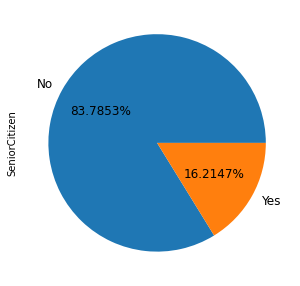

In [26]:
plot_d = (data1['SeniorCitizen'].value_counts()*100.0 /len(data1))\
.plot.pie(autopct='%.4f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
plot_d.yaxis.set_major_formatter

83% of people are younger and 16% people are seniorcitizens

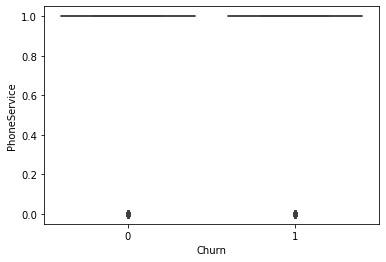

In [27]:

sns.boxplot(x='Churn',y='PhoneService',data=data1)


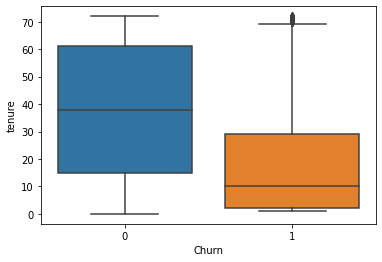

In [28]:
sns.boxplot(x='Churn',y='tenure',data=data1)

Churn when compared with tenure has an outlier

It seems that there is higer churn when the total charges are lower.

Text(0.5, 1.0, '# of Customers by Contract Type')

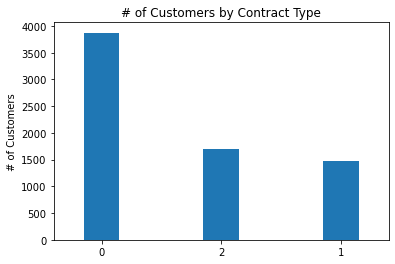

In [29]:

CCn = data1['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
CCn.set_ylabel('# of Customers')
CCn.set_title('# of Customers by Contract Type')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

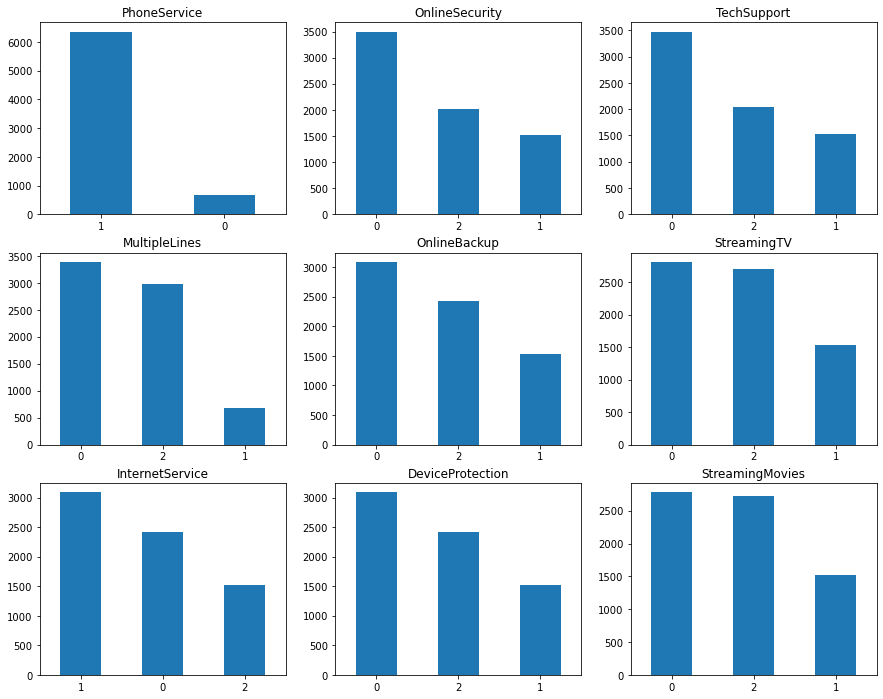

In [30]:
services_data = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services_data):
    if i < 3:
        ax = data1[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data1[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data1[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. This is also what we saw in the earlier chart on correlation with the churn rate.

### Implement Machine Learning Models

In [31]:
#Scaling of the features
#Lets check the variance in magnitude of the features
data1.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3106.343888,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1945.973288,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1382.500000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3070.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4790.500000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6540.000000,1.000000


In [32]:
#to scale import standardizer
from sklearn.preprocessing import StandardScaler

In [33]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74,0
1,Male,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624,0
2,Male,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536,1
3,Male,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570,0
4,Female,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674,1


In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


# Logistic Regression

In [46]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['gender'] = le.fit_transform(data1['gender'])
data1['Partner'] = le.fit_transform(data1['Partner'])
data1['TotalCharges'] = le.fit_transform(data1['TotalCharges'])
data1['PaymentMethod'] = le.fit_transform(data1['PaymentMethod'])
data1['PaperlessBilling'] = le.fit_transform(data1['PaperlessBilling'])
data1['Contract'] = le.fit_transform(data1['Contract'])
data1['StreamingMovies'] = le.fit_transform(data1['StreamingMovies'])
data1['StreamingTV'] = le.fit_transform(data1['StreamingTV'])
data1['TechSupport'] = le.fit_transform(data1['TechSupport'])
data1['DeviceProtection'] = le.fit_transform(data1['DeviceProtection'])
data1['OnlineBackup'] = le.fit_transform(data1['OnlineBackup'])
data1['OnlineSecurity'] = le.fit_transform(data1['OnlineSecurity'])
data1['InternetService'] = le.fit_transform(data1['InternetService'])
data1['MultipleLines'] = le.fit_transform(data1['MultipleLines'])
data1['PhoneService'] = le.fit_transform(data1['PhoneService'])
data1['Dependents'] = le.fit_transform(data1['Dependents'])


In [47]:
#scaling on the quantitative data
# We will use the data frame where we had created dummy variables
targetdf= data1['Churn']
datadf = data1.drop(['Churn'],axis=1)


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
np.random.seed(1000)
x_trg, x_test, y_trg, y_test = train_test_split(datadf, targetdf, random_state=0)
print("Dimension of training dataset:", x_trg.shape)
print("Dimension of test dataset:", x_test.shape)
# training, test = train_test_split(,test_size=0.3)

Dimension of training dataset: (5282, 19)
Dimension of test dataset: (1761, 19)


In [49]:
model = LogisticRegression()
model.fit(x_trg,y_trg)

C:\Users\Niharika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
print("Training set score",model.score(x_trg,y_trg))
print("Test set score",model.score(x_test,y_test))

Training set score 0.8084059068534646
Test set score 0.7847813742191937


In [51]:
pred = model.predict(x_test)

In [52]:
print("The accuracy is ", accuracy_score(y_test,pred))

The accuracy is  0.7847813742191937


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
x_trg, x_test, y_trg, y_test = train_test_split(datadf, targetdf, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x_trg, y_trg)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [54]:
from sklearn import metrics
## Make predictions
prediction_test = model_rf.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.794180269694819


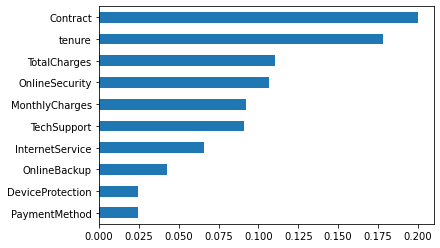

In [55]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=datadf.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### Final Conclusions

Observations(Logistic Regression)

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening

Observations:(Random Forest)

1.From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.

2.The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA